# SVM classifier for keystroke sample data collected from Keystroke signature Application

In [282]:
#import packages
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import math,random
import subprocess

#machine learning
from sklearn import datasets
from sklearn.svm import OneClassSVM,SVC
from sklearn.metrics import roc_curve,auc

# Packages for visuals
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline



## Importing data 

In [284]:
keystroke = pd.read_csv('documents/RealData.csv')

keystroke



,UserName,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return,Target
0,Nikhil,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,...,0.328,0.225,0.135,0.264,0.129,0.111,0.311,0.200,0.112,Genuine
1,Nikhil,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,...,0.312,0.209,0.151,0.272,0.121,0.110,0.304,0.194,0.151,Genuine
2,Nikhil,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,...,0.297,0.154,0.150,0.263,0.113,0.127,0.304,0.177,0.127,Genuine
3,Nikhil,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,...,0.200,0.089,0.143,0.240,0.097,0.159,0.176,0.017,0.087,Genuine
4,Nikhil,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,...,0.184,0.041,0.151,0.224,0.073,0.206,0.192,-0.014,0.119,Genuine
5,Nikhil,0.135,0.424,0.289,0.110,0.184,0.074,0.127,0.296,0.169,...,0.151,0.008,0.136,0.553,0.417,0.135,0.208,0.073,0.095,Genuine
6,Nikhil,0.136,0.216,0.080,0.103,0.200,0.097,0.120,0.241,0.121,...,0.249,0.129,0.159,0.303,0.144,0.160,0.176,0.016,0.112,Genuine
7,Nikhil,0.117,0.287,0.170,0.102,0.183,0.081,0.119,0.248,0.129,...,0.287,0.153,0.119,0.480,0.361,0.167,0.120,-0.047,0.119,Genuine
8,Nikhil,0.119,0.232,0.113,0.103,0.192,0.089,0.111,0.256,0.145,...,0.168,0.041,0.159,0.272,0.113,0.127,0.208,0.081,0.103,Genuine
9,Nikhil,0.119,0.280,0.161,0.119,0.232,0.113,0.119,0.264,0.145,...,0.328,0.201,0.151,0.520,0.369,0.175,0.232,0.057,0.135,Genuine


In [285]:

UserNames = keystroke["UserName"].unique()

In [286]:
def evaluateEER(user_scores, imposter_scores):
    labels = [0]*len(user_scores) + [1]*len(imposter_scores)
    fpr, tpr, thresholds = roc_curve(labels, user_scores + imposter_scores)
    missrates = 1 - tpr
    farates = fpr
    dists = missrates - farates
    idx1 = np.argmin(dists[dists >= 0])
    idx2 = np.argmax(dists[dists < 0])
    x = [missrates[idx1], farates[idx1]]
    y = [missrates[idx2], farates[idx2]]
    a = ( x[0] - x[1] ) / ( y[1] - x[1] - y[0] + x[0] )
    eer = x[0] + a * ( y[0] - x[0] )
    return eer

## Training data  

In [287]:
eers = []
    
for UserName in UserNames:
            
        user_scores = []
        imposter_scores = []
    
        # Consider current subject as genuine and rest as imposters
        #genuine_user_data = keystroke.loc[keystroke.UserName == UserName , "H.period":"H.Return"]
        #imposter_data = keystroke.loc[keystroke.UserName != UserName, :]
        genuine_user_data = data.loc[data.Target == 'Genuine', "H.period" : "H.Return"]
        imposter_data = data.loc[data.Target != 'Genuine', "UserName" : "H.Return"]
    
        # genuine user's first 200 time vectors for training
        train = genuine_user_data[:200]
        train = train.values
        train = np.array(train)
        
        #print type(labels[0])
        test_genuine = genuine_user_data[200:]
        test_genuine = test_genuine.values
        test_genuine = np.array(test_genuine)
        test_imposter = imposter_data.groupby("UserName").head(5).loc[:, "H.period":"H.Return"]
        test_imposter = test_imposter.values
        test_imposter = np.array(test_imposter)
        clf = OneClassSVM(kernel='rbf',gamma=26)
        clf.fit(train)
        
        user_scores = -clf.decision_function(test_genuine)
        imposter_scores = -clf.decision_function(test_imposter)
        
        user_scores = list(user_scores)
        imposter_scores = list(imposter_scores)
        #eers.append(evaluateEER(user_scores, imposter_scores))
        labels = [0]*len(user_scores) + [1]*len(imposter_scores)
        fpr, tpr, thresholds = roc_curve(labels, user_scores + imposter_scores)
        missrates = 1 - tpr
        farates = fpr
        dists = missrates - farates
        idx1 = np.argmin(dists[dists >= 0])
        idx2 = np.argmax(dists[dists < 0])
        x = [missrates[idx1], farates[idx1]]
        y = [missrates[idx2], farates[idx2]]
        a = ( x[0] - x[1] ) / ( y[1] - x[1] - y[0] + x[0] )
        eer = x[0] + a * ( y[0] - x[0] )
        eers.append(x[0] + a * ( y[0] - x[0] ))
        MeanEER= np.mean(eers)
        

In [288]:
print(MeanEER)

0.0756369426752


## Plotting ROC curve: ROC curve is a two-dimensional measure of classification performance. It can be understood as a plot of the probability of classifying correctly the positive examples against the rate of incorrectly classifying true negative examples. In this sense, one can interpret this curve as a comparison of the classifier across the entire range of class distributions.

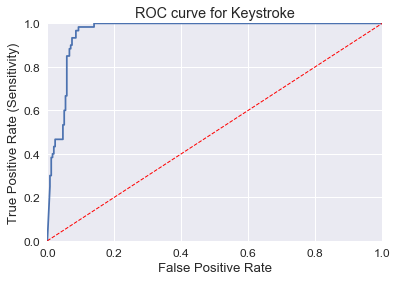

In [245]:
plt.figure()
lw = 1

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Keystroke')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
# computing area under the curve (AUC)
roc_auc= auc(fpr,tpr)



## Determining Area under the curve (AUC) indicator of classifier 

In [246]:
print(roc_auc)

0.962726098191


## Error rate from ROC curve defined as the rate

In [247]:
from scipy.optimize import brentq
from scipy.interpolate import interp1d

eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
thresh = interp1d(fpr, thresholds)(eer)

print(eer)


0.07364341085287361


In [260]:
import itertools
import numpy as np
import csv,sys
import math,random
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


data = pd.read_csv('documents/RealData.csv')


#Get the Training Data
# Take Genuine data for username nikhil(genuine user) and randomn 200 Imposter data for training
class_names = ['Genuine','imposter']
class_names = np.array(class_names)

genuine_user_data = data.loc[data.Target == 'Genuine', "H.period" : "H.Return"]
imposter_data = data.loc[data.Target != 'Genuine', "H.period" : "H.Return"]


imp_train = imposter_data.sample(n=200)
train = genuine_user_data[:200]
train_gen_imp = pd.concat([train, imp_train], axis=0)
#train_tmp = train_gen_imp.values
X_train = np.array(train_gen_imp)

ytrain = [0] * 200 + [1] * 200

y_train= np.array(ytrain)

# For the Training Data

test_genuine = genuine_user_data[200:400]

imp_test = imposter_data.sample(n=200)
test_gen_tmp = pd.concat([test_genuine, imp_test], axis=0)
test_gen_imp = test_gen_tmp.values
X_test = np.array(test_gen_imp)
ytest = [0] * 200 + [1] * 200
y_test = np.array(ytest)
#ytrain = [1]*train.count()
#labels = np.ones(len(train),dtype = np.float64)
#print type(labels[0])
#test_genuine = genuine_user_data[200:400]
#y_test = ytrain
#test_genuine = test_genuine.values
#test_genuine = np.array(test_genuine)

#X_test = test_genuine

#test_imposter = imposter_data.groupby("subject").head(5).loc[:, "H.period":"H.Return"]
#test_imposter = test_imposter.values
#test_imposter = np.array(test_imposter)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)




Confusion matrix, without normalization
[[199   1]
 [  8 192]]
Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.04  0.96]]


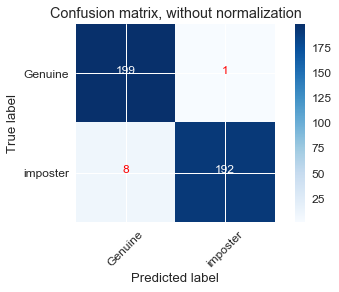

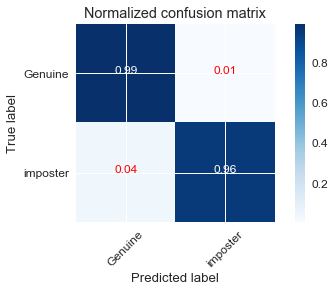

In [275]:
classifier = svm.SVC(kernel='rbf', C=26)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
   """
   This function prints and plots the confusion matrix.
   Normalization can be applied by setting `normalize=True`.
   """
   if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
   else:
       print('Confusion matrix, without normalization')

   print(cm)

   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)

   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "red")

   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                     title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                     title='Normalized confusion matrix')

plt.show()




## Calculating classification metrics to evaluate classifier performance 

In [279]:
from sklearn import metrics
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[0,0]
TN = confusion[1, 1]
FN = confusion[0, 1]
FP = confusion[1, 0]



[[199   1]
 [  8 192]]


## Accuracy 

In [273]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.9775
0.9775


## Precision 

In [281]:
precision = TP / float(TP + FP)


print(metrics.precision_score(y_test, y_pred,average= 'weighted'))

0.978085654927


## Classification error /Mis-classification rate: how often is classifier incorrect? 

In [289]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.0225
0.0225


## Sensitivity: 

## When actual value is positive(genuine) how often is prediction correct? In other words how sensitive it is in detecting "genuine" instances? 

In [267]:
sensitivity = TP / float(FN + TP)

#print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.96


## Specificity: 

## When actual value is negative (imposter) how often is prediction correct? In other words how specific it is in detecting "genuine" instances? 

In [268]:
specificity = TN / (TN + FP)

print(specificity)

0.96


# Accuracy

In [269]:
from sklearn.metrics import accuracy_score ,precision_score
accuracy_score(y_test, y_pred)



0.97750000000000004

# Precision

In [270]:
precision_score(y_test, y_pred,average = 'weighted')

0.97808565492728605

# Cross-validation : Estimate the accuracy of a Support vector machine on the dataset by splitting the data, fitting a model and computing the score 5 consecutive times (with different splits each time):

In [271]:
from sklearn.svm import OneClassSVM,SVC
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C= 1)
scores = cross_val_score(clf, X_test, y_test, cv=5)



In [272]:
#The mean score:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



Accuracy: 0.95 (+/- 0.06)
